In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Calculate Cosine Similarity between documents

In [2]:
stat_original = pd.read_excel('stat_original.xlsx', header=0, index_col=0)
min_original = pd.read_excel('min_original.xlsx', header=0, index_col=0)

In [3]:
def simi_plot(vec, lda_vec, title):
    plt.plot(vec.index.values, vec, color="navy", label="vec")
    plt.plot(vec.index.values, lda_vec, color="red", label="lda_vec")
    plt.title(title)
    plt.xlabel('date')
    plt.ylabel('cos similarity')
    plt.legend(loc="upper right")
    plt.show()

### between statements and minutes of the same meeting

In [4]:
# original vector
similarity = pd.DataFrame(np.zeros([len(pd.concat([stat_original, min_original], axis=1, join='inner')), 1]),
                          index=pd.concat([stat_original, min_original], axis=1, join='inner').index, columns=['cos'])
for id in similarity.index:
    try:
        x = stat_original.loc[id, 'vec_0':]
        y = min_original.loc[id, 'vec_0':]
        cos = np.array(x).dot(np.array(y)) / (np.linalg.norm(x) * np.linalg.norm(y))
        similarity.loc[id, 'cos'] = cos
    except ValueError:
        pass
similarity.describe()

,cos
count,187.000000
mean,-0.010272
std,0.212090
min,-0.595161
25%,-0.165701
50%,0.005521
75%,0.147152
max,0.503766


In [5]:
# lda vector
similarity_lda = pd.DataFrame(np.zeros([len(pd.concat([stat_original, min_original], axis=1, join='inner')), 1]),
                          index=pd.concat([stat_original, min_original], axis=1, join='inner').index, columns=['cos'])
for id in similarity_lda.index:
    try:
        x = stat_original.loc[id, 'lda_0':'vec_0']
        y = min_original.loc[id, 'lda_0':'vec_0']
        cos = np.array(x).dot(np.array(y)) / (np.linalg.norm(x) * np.linalg.norm(y))
        similarity_lda.loc[id, 'cos'] = cos
    except ValueError:
        pass
similarity_lda.describe()

,cos
count,187.000000
mean,0.844532
std,0.129695
min,0.323128
25%,0.749082
50%,0.891346
75%,0.957207
max,0.984248


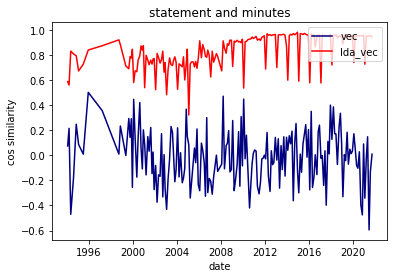

In [6]:
simi_plot(vec=similarity, lda_vec=similarity_lda, title='statement and minutes')

### between 2 consecutive statements

In [7]:
# original vector
similarity = pd.DataFrame(np.zeros([len(stat_original)-1, 1]), index=stat_original.index[1:], columns=['cos'])
for i in range(len(similarity.index)):
    try:
        x = stat_original.loc[stat_original.index[i], 'vec_0':]
        y = stat_original.loc[stat_original.index[i+1], 'vec_0':]
        cos = np.array(x).dot(np.array(y)) / (np.linalg.norm(x) * np.linalg.norm(y))
        similarity.loc[similarity.index[i], 'cos'] = cos
    except ValueError:
        pass
else:
    pass
similarity.describe()

,cos
count,207.000000
mean,-0.011063
std,0.227732
min,-0.647154
25%,-0.170950
50%,0.000355
75%,0.140280
max,0.581317


In [8]:
# lda vector
similarity_lda = pd.DataFrame(np.zeros([len(stat_original)-1, 1]), index=stat_original.index[1:], columns=['cos'])
for i in range(len(similarity.index)):
    try:
        x = stat_original.loc[stat_original.index[i], 'lda_0':'vec_0']
        y = stat_original.loc[stat_original.index[i+1], 'lda_0':'vec_0']
        cos = np.array(x).dot(np.array(y)) / (np.linalg.norm(x) * np.linalg.norm(y))
        similarity_lda.loc[similarity.index[i], 'cos'] = cos
    except ValueError:
        pass
else:
    pass
similarity_lda.describe()

,cos
count,207.000000
mean,0.982118
std,0.070951
min,0.209401
25%,0.995630
50%,0.999172
75%,0.999793
max,1.000000


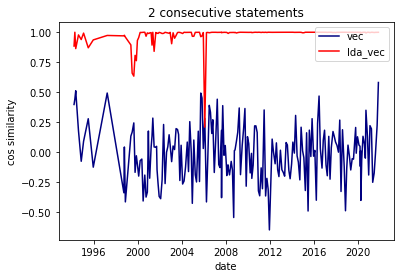

In [9]:
simi_plot(vec=similarity, lda_vec=similarity_lda, title='2 consecutive statements')

### between 2 consecutive minutes

In [10]:
# original vector
similarity = pd.DataFrame(np.zeros([len(min_original)-1, 1]), index=min_original.index[1:], columns=['cos'])
for i in range(len(similarity.index)):
    try:
        x = min_original.loc[min_original.index[i], 'vec_0':]
        y = min_original.loc[min_original.index[i+1], 'vec_0':]
        cos = np.array(x).dot(np.array(y)) / (np.linalg.norm(x) * np.linalg.norm(y))
        similarity.loc[similarity.index[i], 'cos'] = cos
    except ValueError:
        pass
else:
    pass
similarity.describe()

,cos
count,227.000000
mean,0.048592
std,0.281433
min,-0.598122
25%,-0.129247
50%,0.022814
75%,0.171766
max,0.987793


In [11]:
# lda vector
similarity_lda = pd.DataFrame(np.zeros([len(min_original)-1, 1]), index=min_original.index[1:], columns=['cos'])
for i in range(len(similarity.index)):
    try:
        x = min_original.loc[min_original.index[i], 'lda_0':'vec_0']
        y = min_original.loc[min_original.index[i+1], 'lda_0':'vec_0']
        cos = np.array(x).dot(np.array(y)) / (np.linalg.norm(x) * np.linalg.norm(y))
        similarity_lda.loc[similarity.index[i], 'cos'] = cos
    except ValueError:
        pass
else:
    pass
similarity_lda.describe()

,cos
count,227.000000
mean,0.938854
std,0.108148
min,0.537668
25%,0.913626
50%,0.996294
75%,0.998715
max,0.999956


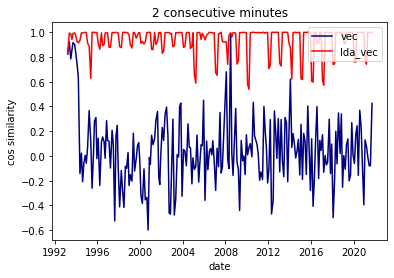

In [12]:
simi_plot(vec=similarity, lda_vec=similarity_lda, title='2 consecutive minutes')